In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

DATAFILE = "data/Messaussetzer_data_in.dat"
df = pd.read_csv(DATAFILE, sep=" ")
t = df["time"].values
y = df["position"].values
u = np.zeros(len(y))
Ts = t[1] - t[0]

print(y[0])

1.32823283830953


In [34]:
# Define system matrices
Ad = np.array([[1, Ts],
               [0, 1]])
Bd = np.array([[0],
               [0]])
C = np.array([1, 0])
D = np.array([0])
Gd = np.array([[Ts],
               [1]])
               
# Initialization
x_dach = np.array([[y[0]], [0]])    # estimate
P_dach = 50 * np.eye(2)
d_y = np.zeros(len(y))              # new error
y_dach = np.zeros(len(y))           # error
s = np.zeros(len(y))                # prediction output array
s_dach = np.zeros(len(y))
v = np.zeros(len(y))                # variation
u = np.zeros(len(y))

P_tilde0 = np.zeros(len(y))
P_tilde1 = np.zeros(len(y))
P_tilde2 = np.zeros(len(y))
P_tilde3 = np.zeros(len(y))

print(y[1] - y_dach[1])

1.81562064480669


In [35]:
y_filtered = []
for i in range(len(t)):
    if str(y[i]) == "nan":
        break
    else:
        y_filtered.append(y[i])

y_rand_var = []
for i in range(0, 3, 1):
    y_rand_temp = random.choices(y_filtered[0:len(y_filtered)], k=30)

    y_rand_var.append(np.var(y_rand_temp))

print(y_rand_var)

R = np.array([min(y_rand_var)])
Q = np.array([0.00016667])

[66.33202658121795, 51.60407202364025, 48.93273038463979]


In [36]:
for k in range(len(y)):
    y_dach[k]= (C @ x_dach + D * u[k])
    d_y[k] = y[k] - y_dach[k]
    K = P_dach @ C.reshape(-1,1)
    # K2 = np.linalg.pinv(C @ P_dach @ C.reshape(-1,1) + R) # does not work
    K = K * (C @ P_dach @ C.reshape(-1,1) + R) ** (-1)
    x_tilde = x_dach + K * d_y[k]
    P_tilde = (np.eye(2) - K * C) @ P_dach

    x_dach = Ad @ x_tilde + Bd * u[k]
    P_dach = Ad @ P_tilde @ Ad.T + Gd @ Q * Gd.T
    s[k] = x_tilde[0]
    v[k] = x_tilde[1]
    s_dach[k] = x_dach[0]

    # P_tilde0 = P_tilde[0][0]
    # P_tilde1 = P_tilde[0][1]
    # P_tilde2 = P_tilde[1][0]
    # P_tilde3 = P_tilde[1][1]

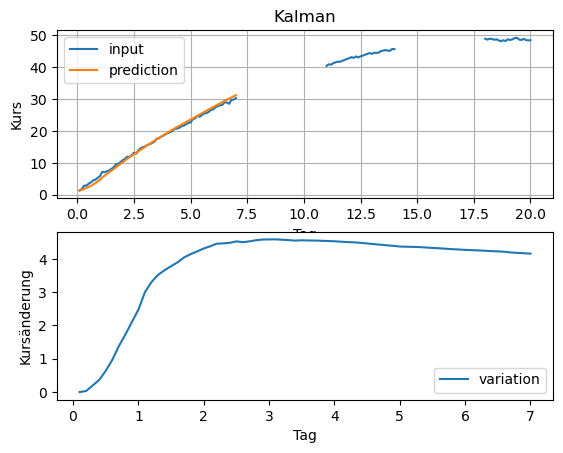

In [37]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title("Kalman")
plt.xlabel("Tag")
plt.ylabel("Kurs")
plt.grid(True)
plt.plot(t, y, label="input")
plt.plot(t, s, label="prediction")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, v, label="variation")
plt.xlabel("Tag")
plt.ylabel("Kursänderung")
plt.legend()
plt.show()